<a href="https://colab.research.google.com/github/grohalex/IADS_SummerSchool/blob/main/day5_Practical_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# packages
!pip install lime
!pip install graphviz
!pip install pydotplus

     |████████████████████████████████| 275 kB 8.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=0862e9d94987ab1a2d08500330d32d3e004a71e1d078ebe2a732527416d7627f
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [2]:
# imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus

from collections import Counter
import pandas as pd
import numpy as np

import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Decision Tree

In [23]:
d = load_iris()
data = pd.DataFrame(data=d.data, columns=d.feature_names)
data.head()
print(d.keys())
#np.shape(d.data)
print(np.shape(d.target))
print(np.shape(d.target_names))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150,)
(3,)


In [6]:
labels = [d.target_names[v] for v in d.target]
Counter(labels)

Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})

In [7]:
col_names = d.feature_names
col_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# **Practical 1**

## Decision Tree

In [28]:
# TODO: split the dataset into training and testing sets
train_data,test_data,train_labels, test_labels = train_test_split(d.data,d.target, test_size=0.2)
print(np.shape(train_data), np.shape(train_labels), np.shape(test_data), np.shape(test_labels))

(120, 4) (120,) (30, 4) (30,)


In [43]:
# TODO: implement a DecisionTreeClassifier (check its documentation page from sklearn)
from sklearn import tree
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=10)
trained_classifier = classifier.fit(train_data, train_labels)
#tree.plot_tree(trained_classifier) 




In [44]:
# TODO: compute model accuracy on the testing set
pred_labels = trained_classifier.predict(test_data)
print(accuracy_score(test_labels, pred_labels))


1.0


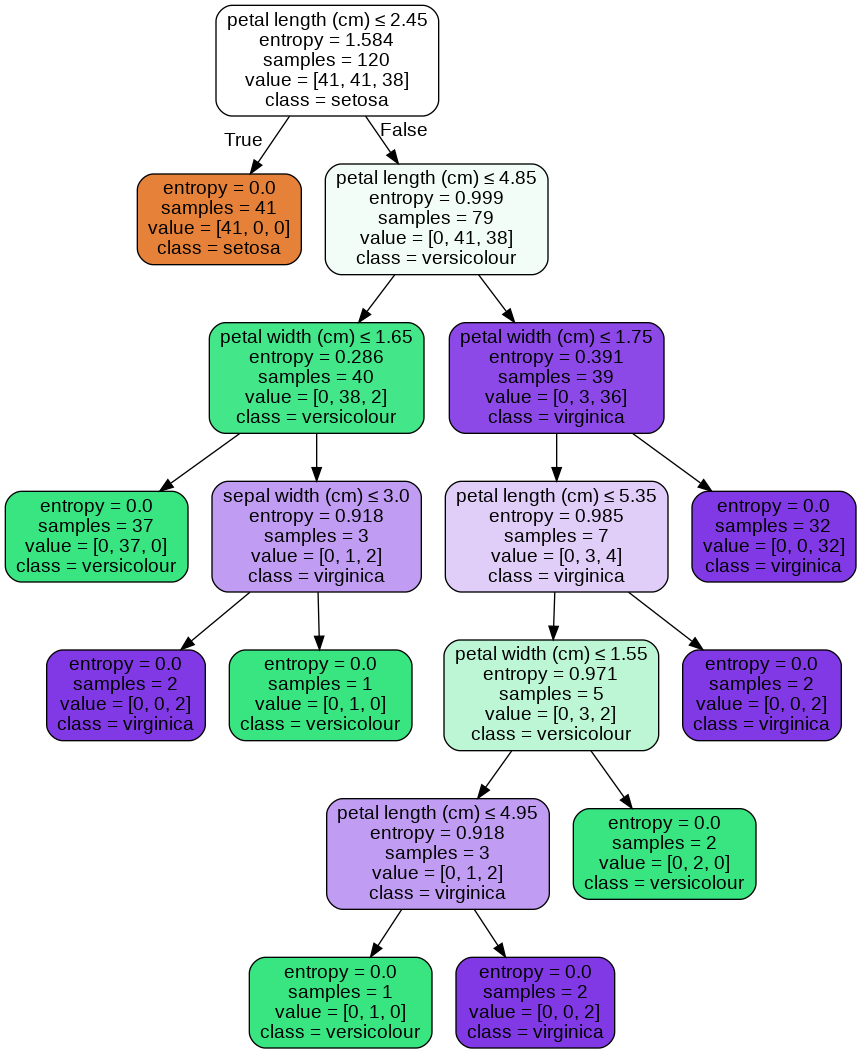

In [46]:
# visualise the tree
# clf is the classifier - replace with the variable name of your classifier
dot_data = StringIO()
export_graphviz(trained_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names, 
                class_names=['setosa', 'versicolour', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

# **Practical 2**

## SVM

In [66]:
# implement SVM - Support Vector Machines (check documentation of SVC from sklearn)
support_vector = SVC(kernel="linear", C=0.6, random_state=1, probability=True)  #the settings improved the accuracy!
support_vector.fit(train_data,train_labels)
pred_labels = support_vector.predict(test_data)
print(accuracy_score(test_labels, pred_labels))

1.0


## Feature pertubation

In [ ]:
# select an instance 
i = 10

# make a copy of the existing data point so we can modify it without altering our data
temp = test[i].copy()

# get the indices of the features: sepal length (cm);	sepal width (cm);	petal length (cm);	petal width (cm)
feature_index = lambda x: iris.feature_names.index(x)

In [ ]:
print('Increasing petal width')
print('P(setosa) before:', svc_clf.predict_proba(temp.reshape(1,-1))[0,0])
# TODO: set some value to the petal width feature

# TODO: print the SVM's prediction of the new instance

In [ ]:
print('Increasing petal length')
# TODO: do the same but for petal length feature

In [ ]:
print('Increasing both')
# TODO: do the same but for both features: petal width and petal length

In [ ]:
# the above can be done simply by passing in a point, predicting its class, and the modifying it
# this will predict probabilities for each class
# TODO: use SVM to predict probabilites of several, manually created datapoints

# **Practical 5**

In [ ]:
# TODO: use LimeTabularExplainer to explain predictions

In [ ]:
# exp is the explained instance
exp.show_in_notebook(show_table=True, show_all=False) # show_all=False means we display only the features used in explanations